# Imports

In [2]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
phone_data=pd.read_csv("mobile_usage_behavioral_analysis.csv")

# Data Preprocessing

In [4]:
phone_data.describe()

,User_ID,Age,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,38.745000,6.405670,7.696310,16.64700,2.456330,2.495270,2.475410
std,288.819436,12.186734,3.134855,3.714187,7.61961,1.439525,1.443392,1.450362
min,1.000000,18.000000,1.000000,1.010000,3.00000,0.000000,0.000000,0.010000
25%,250.750000,28.000000,3.590000,4.530000,10.00000,1.200000,1.282500,1.220000
50%,500.500000,40.000000,6.455000,7.880000,17.00000,2.445000,2.435000,2.455000
75%,750.250000,50.000000,9.122500,10.910000,23.00000,3.672500,3.710000,3.782500
max,1000.000000,59.000000,11.970000,14.000000,29.00000,4.990000,5.000000,5.000000


In [5]:
phone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.3+ KB


In [6]:
print(phone_data)

     User_ID  Age  Gender  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
0          1   56    Male                   2.61                     7.15   
1          2   46    Male                   2.13                    13.79   
2          3   32  Female                   7.28                     4.50   
3          4   25  Female                   1.20                     6.29   
4          5   38    Male                   6.31                    12.59   
..       ...  ...     ...                    ...                      ...   
995      996   41  Female                   3.58                    12.46   
996      997   32    Male                   9.65                    10.51   
997      998   46  Female                  11.68                    10.06   
998      999   25    Male                   3.89                    10.78   
999     1000   22  Female                   3.99                     7.05   

     Number_of_Apps_Used  Social_Media_Usage_Hours  \
0                    

# Analysis

In [7]:
phone_data_m=phone_data["Gender"]=="Male"
phone_data_f=phone_data["Gender"]=="Female"
gaming_app_m=phone_data[phone_data_m]["Gaming_App_Usage_Hours"]
gaming_app_f=phone_data[phone_data_f]["Gaming_App_Usage_Hours"]
productive_app_m=phone_data[phone_data_m]["Productivity_App_Usage_Hours"]
productive_app_f=phone_data[phone_data_f]["Productivity_App_Usage_Hours"]

### Gaming Analysis

In [8]:
gaming_app_m.describe()

count    517.000000
mean       2.464720
std        1.468256
min        0.010000
25%        1.110000
50%        2.540000
75%        3.790000
max        5.000000
Name: Gaming_App_Usage_Hours, dtype: float64

In [9]:
gaming_app_f.describe()

count    483.000000
mean       2.486853
std        1.432393
min        0.020000
25%        1.320000
50%        2.360000
75%        3.780000
max        4.990000
Name: Gaming_App_Usage_Hours, dtype: float64

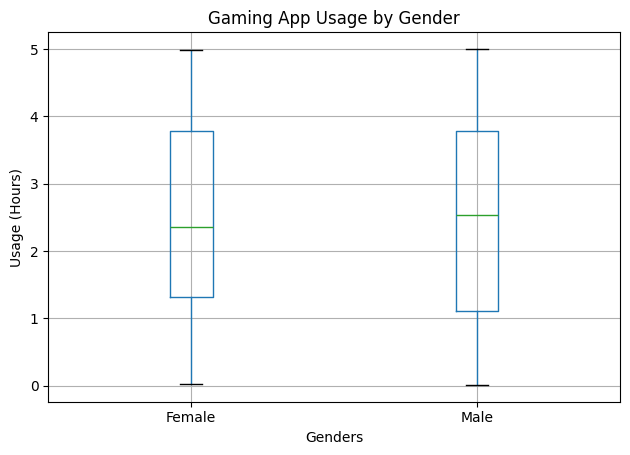

In [10]:
phone_data.boxplot(column="Gaming_App_Usage_Hours", by="Gender")       
plt.title("Gaming App Usage by Gender")
plt.xlabel("Genders")
plt.ylabel("Usage (Hours)")
plt.suptitle("")
plt.tight_layout()

### Productivity Analysis

In [11]:
productive_app_m.describe()

count    517.000000
mean       2.521915
std        1.451721
min        0.000000
25%        1.290000
50%        2.530000
75%        3.740000
max        5.000000
Name: Productivity_App_Usage_Hours, dtype: float64

In [12]:
productive_app_f.describe()

count    483.000000
mean       2.466749
std        1.435380
min        0.030000
25%        1.220000
50%        2.350000
75%        3.680000
max        4.990000
Name: Productivity_App_Usage_Hours, dtype: float64

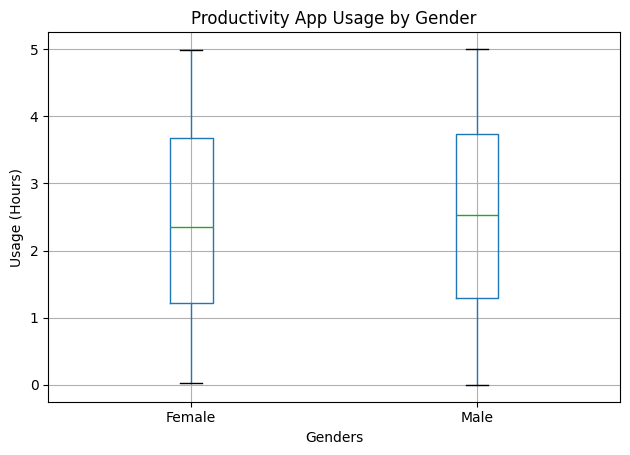

In [13]:
phone_data.boxplot(column="Productivity_App_Usage_Hours", by="Gender")       
plt.title("Productivity App Usage by Gender")
plt.xlabel("Genders")
plt.ylabel("Usage (Hours)")
plt.suptitle("")
plt.tight_layout()

### Age vs. Screen Time

Correlation Coefficient: -0.017638579908799662


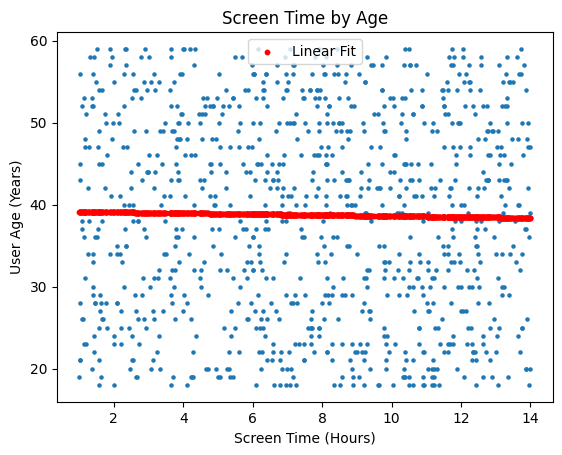

In [14]:
screen_time=phone_data["Daily_Screen_Time_Hours"]
user_age=phone_data["Age"]
plt.scatter(screen_time , user_age, s=5,)
plt.ylabel("User Age (Years)")
plt.xlabel("Screen Time (Hours)")
plt.title("Screen Time by Age")
corr = scipy.stats.pearsonr(screen_time, user_age).statistic
print("Correlation Coefficient:", corr)
linear_model = scipy.stats.linregress(screen_time,user_age)
slope=linear_model.slope
intercept = linear_model.intercept
linear_fit=slope*screen_time+intercept
plt.scatter(screen_time, linear_fit, color="red", s=10, label="Linear Fit")
plt.legend()

### Correlation Analysis

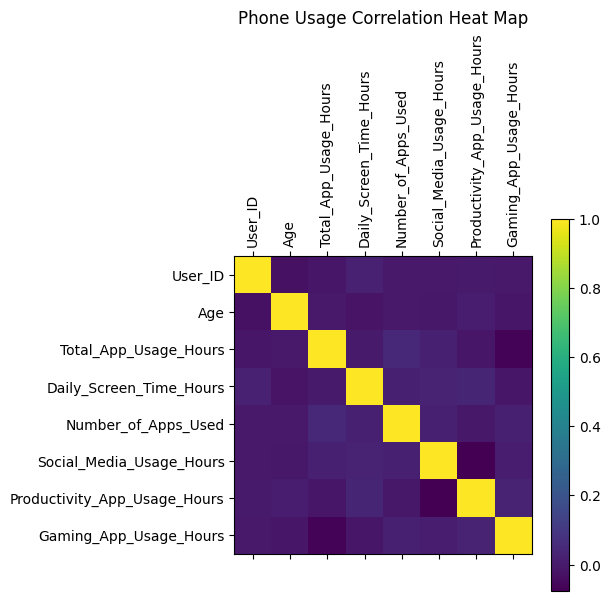

In [15]:
corr_scores=phone_data.corr(numeric_only=True)
plt.matshow(corr_scores)
num_labels=len(corr_scores.index)
plt.xticks(ticks=range(num_labels), labels=corr_scores.index,rotation=90)
plt.yticks(ticks=range(num_labels), labels=corr_scores.index,rotation=0)
plt.colorbar()
plt.title("Phone Usage Correlation Heat Map")
plt.show()

In [16]:
phone_data_categorical=pd.crosstab(phone_data["Gender"],phone_data["Location"])
c,p,dog,expecter=scipy.stats.chi2_contingency(phone_data_categorical)
print("The P-Value is:",p)

The P-Value is: 0.5537589183325635


### Kmeans Analysis

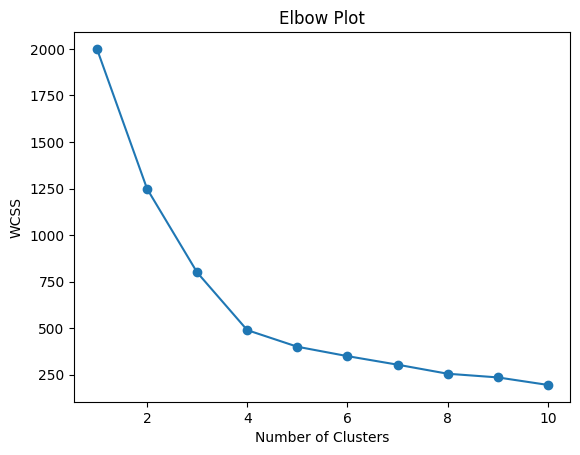

In [24]:
phone_data_kmeans=phone_data[["Age","Total_App_Usage_Hours"]]
scaler=StandardScaler()
scaled_data=scaler.fit_transform(phone_data_kmeans)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker="o")
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

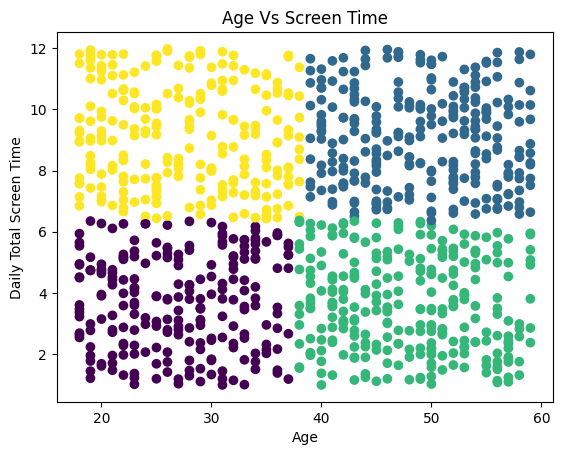

In [18]:
clusters=kmeans.fit_predict(scaled_data)
phone_data['Cluster']=clusters
plt.scatter(phone_data["Age"],phone_data["Total_App_Usage_Hours"],c=phone_data['Cluster'],cmap="viridis")
plt.xlabel('Age')
plt.ylabel('Daily Total Screen Time')
plt.title('Age Vs Screen Time')
plt.show()

### Knearest Neighbors Analysis

In [19]:
X=phone_data[["Age","Total_App_Usage_Hours"]]
y=phone_data["Cluster"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.6)

In [20]:
classifier=KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train,y_train)
prediction=classifier.predict(X_test)
accuracy=accuracy_score(y_test, prediction)
print("Accuracy:",accuracy*100)

Accuracy: 96.33333333333334


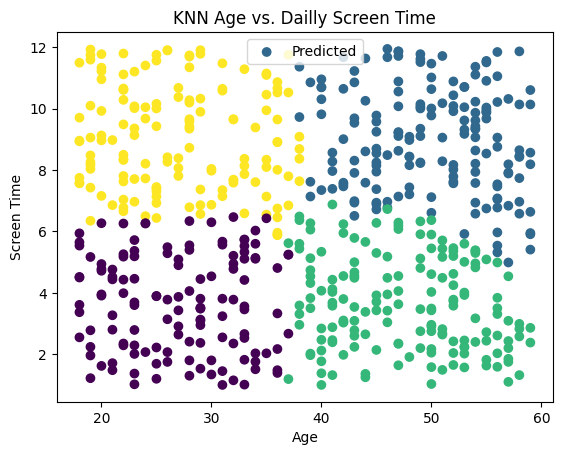

In [21]:
plt.scatter(X_test['Age'], X_test['Total_App_Usage_Hours'], c=prediction, cmap='viridis', label='Predicted')
plt.title('KNN Age vs. Dailly Screen Time')
plt.xlabel('Age')
plt.ylabel('Screen Time')
plt.legend()
plt.show()

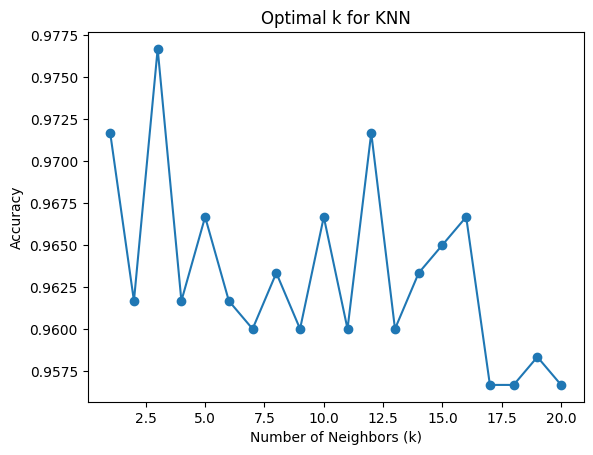

In [22]:
scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Plot the results
plt.plot(range(1, 21), scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Optimal k for KNN')
plt.show()

In [23]:
# Perform K nearest neighbors to determnine if y values are preictable.
# Talk about concern of growing screen time in younger people but there is no correlation in the data.